In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [4]:
df.drop(['ADDRESS', 'SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH'], axis=1, inplace=True)

test_df.drop(['ADDRESS', 'SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH'], axis=1, inplace=True)

In [5]:
df.head()

,ID,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,520000,5,2,4.0,674,266,2007.0,35500,3000,6030,-31.656206,115.720566,1.079230,120.0
1,1,575000,5,4,2.0,540,301,2014.0,16900,8100,6065,-31.800802,115.867675,0.667585,NaN
2,2,760000,4,2,2.0,781,220,1992.0,33500,3500,6030,-31.682040,115.702600,0.650761,111.0
3,3,1230000,2,1,2.0,425,185,1938.0,3500,1500,6016,-31.926046,115.838181,0.484465,106.0
4,4,2010000,3,2,2.0,546,186,2004.0,12900,800,6159,-32.032079,115.759626,1.869050,25.0


<AxesSubplot:>

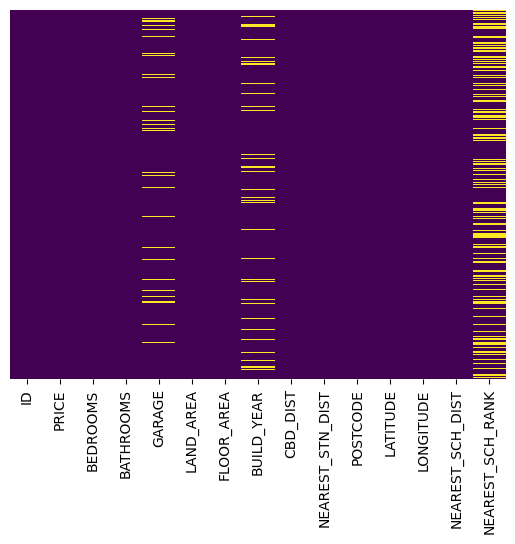

In [6]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [7]:
df.drop('NEAREST_SCH_RANK', axis=1, inplace=True)

test_df.drop('NEAREST_SCH_RANK', axis=1, inplace=True)

<AxesSubplot:>

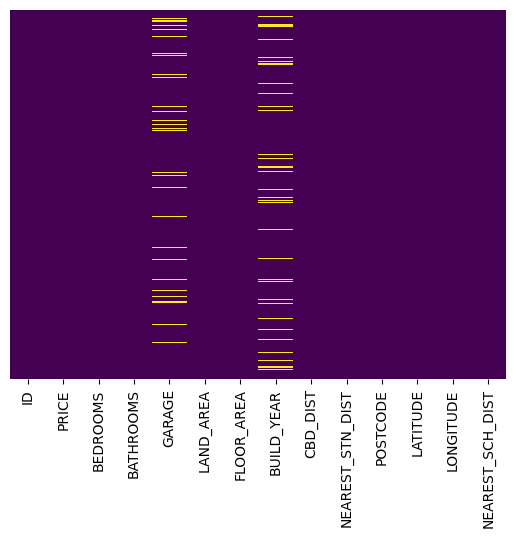

In [8]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [9]:
df['BUILD_YEAR'].fillna(df['BUILD_YEAR'].value_counts().idxmax(), inplace=True)

test_df['BUILD_YEAR'].fillna(test_df['BUILD_YEAR'].value_counts().idxmax(), inplace=True)

In [10]:
df['GARAGE'].fillna(0, inplace=True)

test_df['GARAGE'].fillna(0, inplace=True)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

X = df.drop('PRICE', axis=1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model.fit(X_train, y_train)

score = model.score(X_test, y_test)

score

0.5567063549566305

In [13]:
pred = model.predict(test_df)

pred

array([ 487584.40268695, 1180846.44879614, 1071364.27432334, ...,
        904964.26305331, 1043313.12874827,  102827.46488641])

In [15]:
submit_df = pd.read_csv('./sample_submission.csv')

submit_df['PRICE'] = pred

submit_df.to_csv('model10_REG_test2_56.csv', index=False)